# Exploring s&p500 stocks

In [8]:
import pandas as pd  #pandas does things with matrixes
import numpy as np #used for sorting a matrix
import matplotlib.pyplot as plt #matplotlib is used for plotting data
import matplotlib.ticker as ticker #used for changing tick spacing
import datetime as dt #used for dates
import matplotlib.dates as mdates #used for dates, in a different way
import os #used for changes of directory
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../')
from utils import simple_plot, simple_plot_by_date, hit_count

In [2]:
dataset_1yr = pd.read_csv("../../Data/all_stocks_5yr.csv")
dataset_1yr.head()

# Changing the date column to the datetime format (best format to work with time series)
dataset_1yr['Date'] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dataset_1yr['Date']]

dataset_1yr.head()

,Date,Open,High,Low,Close,Volume,Name
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


In [3]:
dataset_1yr.describe()

,Open,High,Low,Close,Volume
count,606417.000000,606593.000000,606574.000000,606801.000000,6.063950e+05
mean,79.529041,80.257435,78.799338,79.557920,4.500925e+06
std,93.383162,94.187977,92.535300,93.382168,9.336171e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,38.070000,38.460000,37.700000,38.090000,1.077091e+06
50%,59.240000,59.790000,58.690000,59.270000,2.131913e+06
75%,89.390000,90.150000,88.620000,89.430000,4.442768e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [4]:
# Getting rid of null columns

missing_data = pd.DataFrame(dataset_1yr.isnull().sum()).T
print(missing_data)

for index, column in enumerate(missing_data.columns):
    if missing_data.loc[0][index] != 0:
        dataset_1yr = dataset_1yr.drop(dataset_1yr.loc[dataset_1yr[column].isnull()].index)
        
missing_data = pd.DataFrame(dataset_1yr.isnull().sum()).T
print(missing_data)

   Date  Open  High  Low  Close  Volume  Name
0     0   384   208  227      0     406     0
   Date  Open  High  Low  Close  Volume  Name
0     0     0     0    0      0       0     0


In [5]:
# Assigning a mid price column with the mean of the Highest and Lowest values

dataset_1yr['Mid'] = (dataset_1yr['High'] + dataset_1yr['Low'])/2
dataset_1yr.head()

,Date,Open,High,Low,Close,Volume,Name,Mid
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM,92.165
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM,92.255
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM,92.340
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM,93.040
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM,93.945


In [6]:
stocknames = dataset_1yr.Name.unique()
stocknames = np.sort(stocknames, kind='quicksort')
print(stocknames[:20])

['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN']


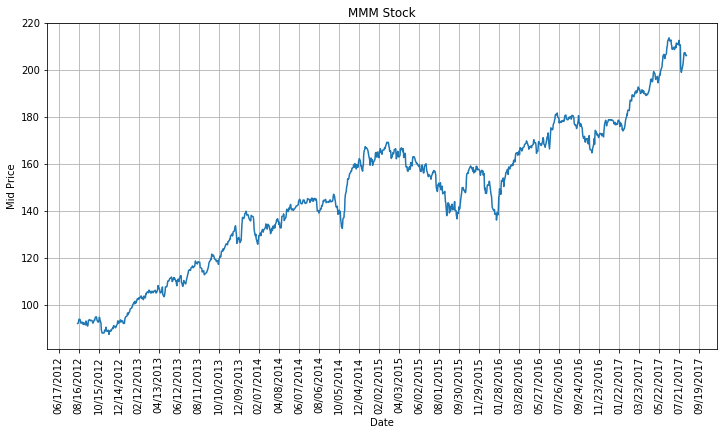

In [8]:
fig1 = simple_plot(dataset_1yr, 'MMM', 'Mid')
#plt.savefig('stock.pdf')

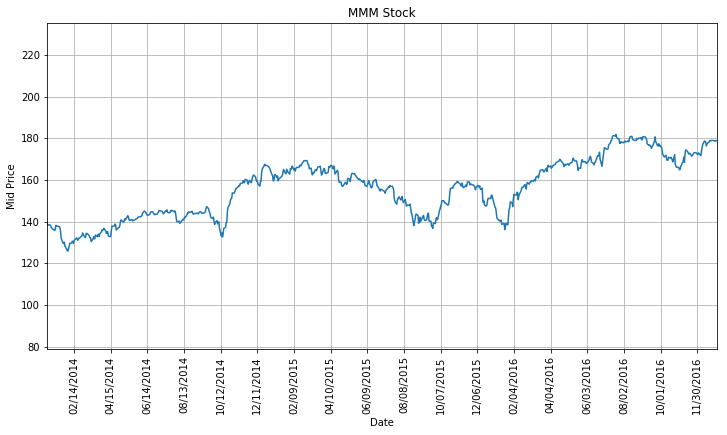

In [9]:
simple_plot_by_date(dataset_1yr, 'MMM', 'Mid', '2014-01-01', '2017-01-01')
#plt.savefig('stock.pdf')

In [10]:
# Let's analyze 3M stocks a bit deeper

MMM_stocks = dataset_1yr[dataset_1yr['Name'] == 'MMM']

MMM_stocks.head()

,Date,Open,High,Low,Close,Volume,Name,Mid
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM,92.165
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM,92.255
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM,92.340
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM,93.040
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM,93.945


In [11]:
# Creating a percent change column related to the closing price

percent_change_closing_price = MMM_stocks['Close'].pct_change()
percent_change_closing_price.fillna(0, inplace=True)

MMM_stocks['PC_change'] = pd.DataFrame(percent_change_closing_price)
MMM_stocks.head()

,Date,Open,High,Low,Close,Volume,Name,Mid,PC_change
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM,92.165,0.000000
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM,92.255,-0.001082
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM,92.340,0.002600
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM,93.040,0.012967
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM,93.945,0.005334


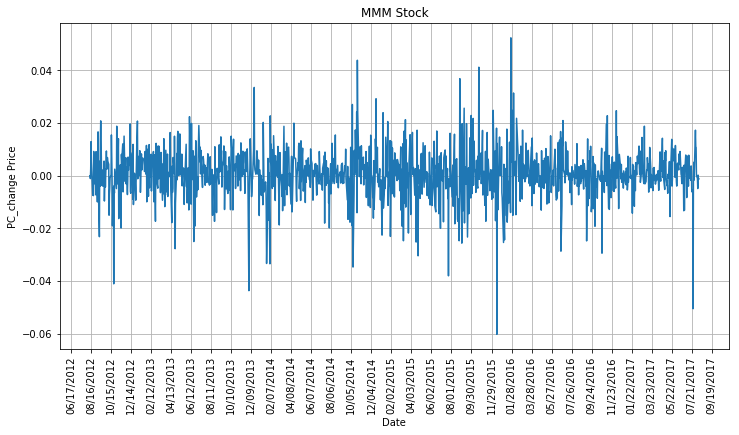

In [12]:
simple_plot(MMM_stocks, 'MMM', 'PC_change')

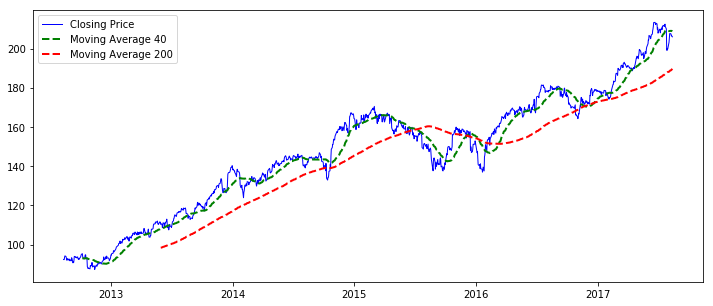

In [79]:
# Printing some moving averages to check curve smoothness

closing_price = MMM_stocks['Close']

moving_avg_40 = closing_price.rolling(window=40).mean()
moving_avg_200 = closing_price.rolling(window=200).mean()

plt.figure(figsize=(12,5))

df = pd.DataFrame({'x': MMM_stocks['Date'] , 'y0': MMM_stocks['Close'], 'y1': moving_avg_40, 'y2': moving_avg_200})

plt.plot( 'x', 'y0', data=df, marker='', color='blue', linewidth=1, label = "Closing Price")
plt.plot( 'x', 'y1', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label = "Moving Average 40")
plt.plot( 'x', 'y2', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="Moving Average 200")
plt.legend()
plt.show()

(1057,)
(200,)


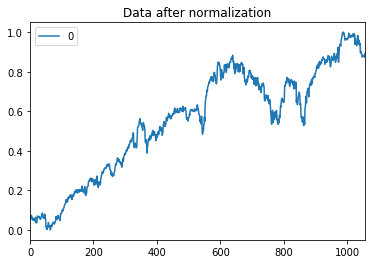

In [85]:
from sklearn.preprocessing import MinMaxScaler # It scales the data between 0 and 1

# Let's apply some models to predict closing prices
# Total of samples = 1257

#training_size = int(closing_price.shape[0]*0.9)
training_size = 1057

train_data = np.array(closing_price[:training_size])
test_data = np.array(closing_price[training_size:])

print(train_data.shape)
print(test_data.shape)

train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Reshape both train and test data
train_data = train_data.reshape(-1)
test_data = test_data.reshape(-1)

pd.DataFrame(train_data).plot()    
plt.title("Data after normalization")    
plt.show()

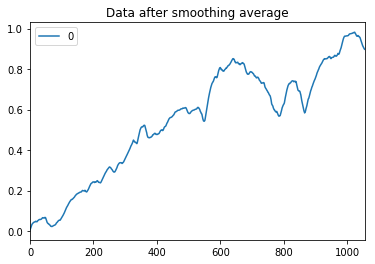

In [86]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data

EMA = 0.0
gamma = 0.1
for ti in range(len(train_data)):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

pd.DataFrame(train_data).plot()    
plt.title("Data after smoothing average")    
plt.show()
# Used for visualization and test purposes
all_mid_data = scaler.inverse_transform(np.concatenate([train_data,test_data],axis=0).reshape(-1,1))

In [87]:
# Defining a hit counter function

def hit_count(predictions, real):    
    number_of_hits = 0
    up_hit = down_hit = 0    
    for i in range(1, len(horizon_predicted)):
        up_hit = predictions[i-1]>predictions[i] and real[i-1]>real[i]
        down_hit = predictions[i-1]<predictions[i] and real[i-1]<real[i]
        if up_hit or down_hit:
            number_of_hits +=1
    return number_of_hits

Mean Squared Error (Testing Data): 1.583224
Mean Absolute Error (Testing Data): 0.971164
Root Mean Squared Error (Testing Data): 1.258262


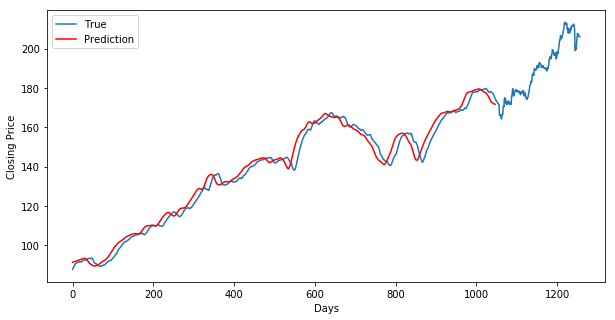

In [88]:
# Moving Average - Training Data

from sklearn.metrics import mean_squared_error, mean_absolute_error

window_size = 10
predictions = list()

def moving_window_average(data, window_len):
    mov_avg_prediction = np.mean(data[-window_len:])
    return mov_avg_prediction

for timepoint in range(window_size, train_data.size):
    ActualValue = train_data[timepoint]
    forecast = moving_window_average(train_data[timepoint:window_size+timepoint], window_size)
    predictions.append(forecast)

horizon_predicted = np.array(predictions).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = train_data[window_size:].reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)

plt.figure(figsize = (10,5))
plt.plot(range(MMM_stocks.shape[0]),all_mid_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

Mean Squared Error (Testing Data): 10.082745
Mean Absolute Error (Testing Data): 2.389065
Root Mean Squared Error (Testing Data): 3.175334
Number of Hits 104 out of 199


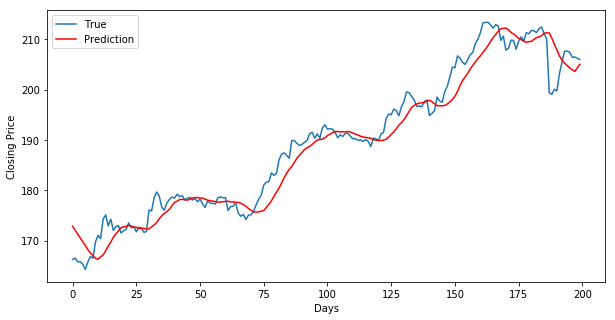

In [89]:
# Moving Average - Prediction of the "Future" with testing points (Horizon = 1)

window_size = 10
Actual = [x for x in train_data]
predictions = list()

for timepoint in range(len(test_data)):
    ActualValue =  test_data[timepoint]
    forecast = moving_window_average(Actual, window_size) 
    #print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    predictions.append(forecast)
    Actual.append(ActualValue) 

horizon_predicted = np.array(predictions).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = test_data.reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print("Number of Hits %d out of %d" % (hit_count(inverse_test_data, horizon_predicted), len(horizon_predicted)-1))

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

Mean Squared Error (Testing Data): 4.100142
Mean Absolute Error (Testing Data): 1.355498
Root Mean Squared Error (Testing Data): 2.024881
Number of Hits 116 out of 199


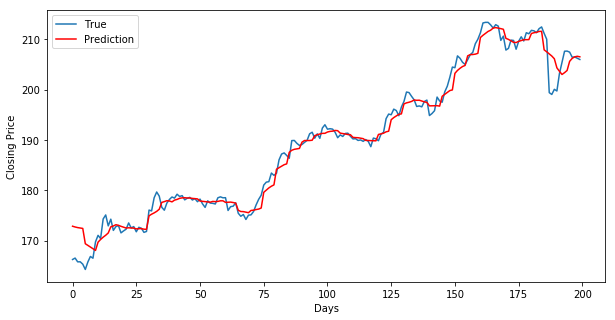

In [90]:
# Moving Average - Prediction of the "Future" with testing points (Horizon = 5)

window_size = 10
Horizon = 5
Actual = [x for x in train_data]
horizon_predicted = list()
counter = 0

for _ in range(int(len(test_data)/Horizon)):
    for i in range(Horizon):
        forecast = moving_window_average(Actual, window_size) 
        Actual.append(forecast)
        horizon_predicted.append(forecast)
        counter = counter + 1
    
    Actual = Actual[Horizon:-Horizon]
    [Actual.append(term) for term in test_data[counter:counter+Horizon]]

horizon_predicted = np.array(horizon_predicted).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = test_data.reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print("Number of Hits %d out of %d" % (hit_count(inverse_test_data, horizon_predicted), len(horizon_predicted)-1))

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

Mean Squared Error (Testing Data): 0.911870
Mean Absolute Error (Testing Data): 0.611875
Root Mean Squared Error (Testing Data): 0.954919
Number of Hits 822 out of 1029


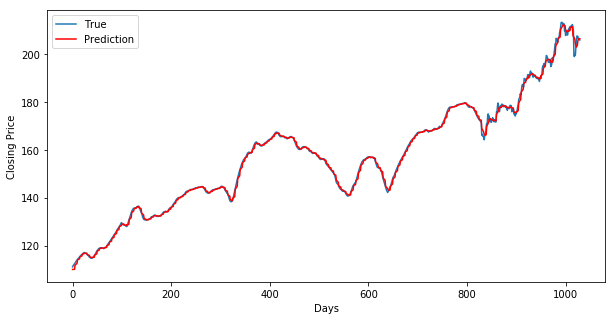

In [92]:
# Moving Average - Prediction of the "Future" for the last 1030 points (Horizon = 5)

window_size = 10
Horizon = 5
Actual = [x for x in train_data[:227]]
horizon_predicted = list()
counter = 0
evaluation_data = np.concatenate([train_data[227:], test_data], axis=0)

for _ in range(int(len(evaluation_data)/Horizon)):
    for i in range(Horizon):
        forecast = moving_window_average(Actual, window_size) 
        Actual.append(forecast)
        horizon_predicted.append(forecast)
        counter = counter + 1
    
    Actual = Actual[Horizon:-Horizon]
    [Actual.append(term) for term in evaluation_data[counter:counter+Horizon]]

horizon_predicted = np.array(horizon_predicted).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = evaluation_data.reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print("Number of Hits %d out of %d" % (hit_count(inverse_test_data, horizon_predicted), len(horizon_predicted)-1))

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

Mean Squared Error (Testing Data): 0.350709
Mean Absolute Error (Testing Data): 0.459215
Root Mean Squared Error (Testing Data): 0.592207


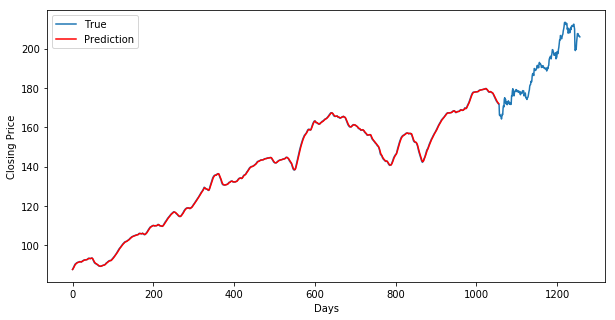

In [93]:
# Exponential Smoothing Average - Training Data 

smoothing_constant = 0.5

predictions = list()
last_prediction = train_data[0]

for timepoint in range(1, train_data.size):
    last_prediction = last_prediction * smoothing_constant + (1.0 - smoothing_constant) * train_data[timepoint-1]
    predictions.append(last_prediction)

horizon_predicted = np.array(predictions).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = train_data[1:].reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)

plt.figure(figsize = (10,5))
plt.plot(range(MMM_stocks.shape[0]),all_mid_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

Mean Squared Error (Testing Data): 3.246290
Mean Absolute Error (Testing Data): 1.241121
Root Mean Squared Error (Testing Data): 1.801746
Number of Hits 89 out of 198


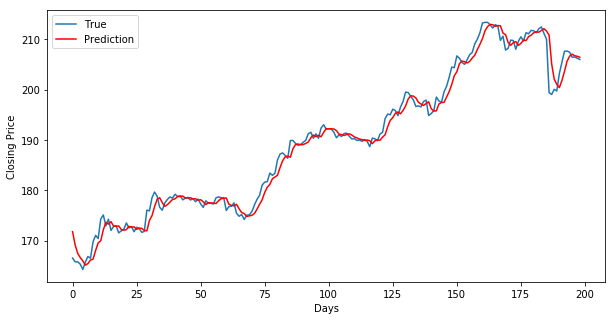

In [94]:
# Exponential Smoothing Average - Prediction of the "Future" with testing points (Horizon = 1)

smoothing_constant = 0.5
Actual = [train_data[-1:]]
predictions = list()
last_prediction = train_data[-1]

for timepoint in range(1, len(test_data)):
    ActualValue =  test_data[timepoint]
    last_prediction = last_prediction * smoothing_constant + (1.0 - smoothing_constant) * Actual[timepoint-1]    
    predictions.append(last_prediction)
    Actual.append(ActualValue) 

horizon_predicted = np.array(predictions).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = test_data[1:].reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print("Number of Hits %d out of %d" % (hit_count(inverse_test_data, horizon_predicted), len(horizon_predicted)-1))

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

Mean Squared Error (Testing Data): 5.019785
Mean Absolute Error (Testing Data): 1.612379
Root Mean Squared Error (Testing Data): 2.240488
Number of Hits 23 out of 199


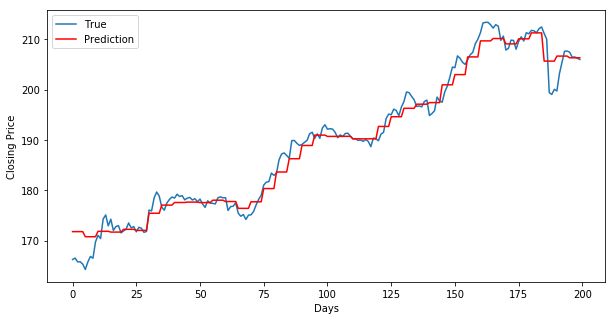

In [95]:
# Exponential Smoothing Average - Prediction of the "Future" with testing points (Horizon = 5)

smoothing_constant = 0.5
Horizon = 5
Actual = [train_data[-1:]]
horizon_predicted = list()
counter = 0
last_prediction = float(train_data[-1:])

for _ in range(int(len(test_data)/Horizon)):
    for i in range(Horizon):
        last_prediction = last_prediction * smoothing_constant + (1.0 - smoothing_constant) * Actual[-1]     
        Actual.append(last_prediction)
        horizon_predicted.append(last_prediction)
        counter = counter + 1
    
    Actual = Actual[:-Horizon]
    [Actual.append(term) for term in test_data[counter:counter+Horizon]]

horizon_predicted = np.array(horizon_predicted).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = test_data.reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print("Number of Hits %d out of %d" % (hit_count(inverse_test_data, horizon_predicted), len(horizon_predicted)-1))

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

Mean Squared Error (Testing Data): 1.520639
Mean Absolute Error (Testing Data): 0.868128
Root Mean Squared Error (Testing Data): 1.233142
Number of Hits 168 out of 1029


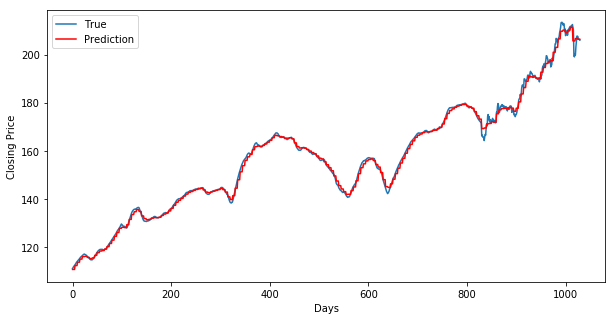

In [96]:
# Exponential Smoothing Average - Prediction of the "Future" for the last 1030 points (Horizon = 5)

smoothing_constant = 0.5
Horizon = 5
Actual = [x for x in train_data[226:227]]
horizon_predicted = list()
counter = 0
evaluation_data = np.concatenate([train_data[227:], test_data], axis=0)
last_prediction = float(train_data[226:227])

for _ in range(int(len(evaluation_data)/Horizon)):
    for i in range(Horizon):
        last_prediction = last_prediction * smoothing_constant + (1.0 - smoothing_constant) * Actual[-1]     
        Actual.append(last_prediction)
        horizon_predicted.append(last_prediction)
        counter = counter + 1
    
    Actual = Actual[:-Horizon]
    [Actual.append(term) for term in evaluation_data[counter:counter+Horizon]]

horizon_predicted = np.array(horizon_predicted).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = evaluation_data.reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print("Number of Hits %d out of %d" % (hit_count(inverse_test_data, horizon_predicted), len(horizon_predicted)-1))

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

C:\Users\IBK1000\Anaconda3\envs\finance_class\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\IBK1000\Anaconda3\envs\finance_class\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mean Squared Error (Testing Data): 2.482735
Mean Absolute Error (Testing Data): 1.077683
Root Mean Squared Error (Testing Data): 1.575670
Number of Hits 94 out of 200


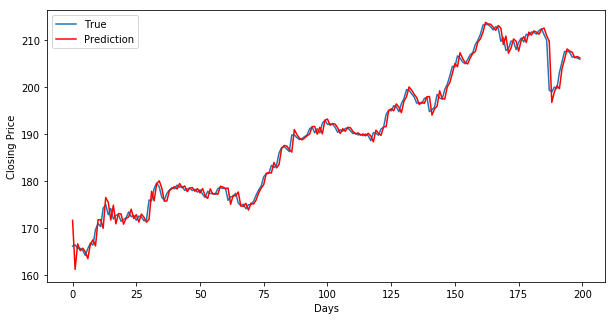

In [73]:
# ARIMA (Horizon = 1)

# Parameters 
# p: The number of lag observations included in the model, also called the lag order.
# d: The number of times that the raw observations are differenced, also called the degree of differencing.
# q: The size of the moving average window, also called the order of moving average.
# -> Follow the Box-Jenkins Methodology to find optimal parameters.

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#pd.plotting.autocorrelation_plot(pd.DataFrame(train_data))
#plt.show()

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

Actual = [x for x in train_data]
predictions = list()

for timepoint in range(len(test_data)):
    ActualValue =  test_data[timepoint]
    Prediction = StartARIMAForecasting(Actual, 1,1,0) 
    predictions.append(Prediction)
    Actual.append(ActualValue)

horizon_predicted = np.array(predictions).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = test_data.reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print("Number of Hits %d out of %d" % (hit_count(inverse_test_data, horizon_predicted), len(horizon_predicted)-1))

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

C:\Users\IBK1000\Anaconda3\envs\finance_class\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\IBK1000\Anaconda3\envs\finance_class\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\IBK1000\Anaconda3\envs\finance_class\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Mean Squared Error (Testing Data): 5.948612
Mean Absolute Error (Testing Data): 1.605595
Root Mean Squared Error (Testing Data): 2.438978
Number of Hits 120 out of 199


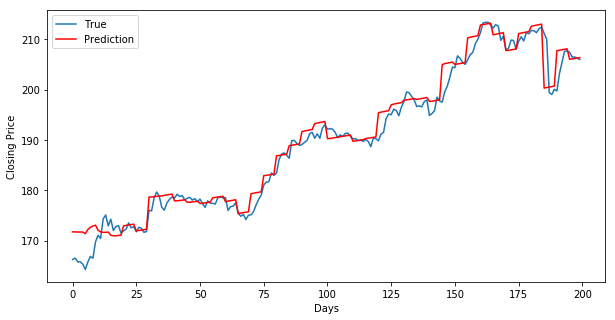

In [76]:
# ARIMA (Horizon = 5)

Horizon = 5
Actual = [x for x in train_data]
horizon_predicted = list()
counter = 0

for _ in range(int(len(test_data)/Horizon)):
    for i in range(Horizon):
        forecast = StartARIMAForecasting(Actual, 1,1,0)
        Actual.append(forecast)
        horizon_predicted.append(forecast)
        counter = counter + 1
    
    Actual = Actual[Horizon:-Horizon]
    [Actual.append(term) for term in test_data[counter:counter+Horizon]]

horizon_predicted = np.array(horizon_predicted).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = test_data.reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print("Number of Hits %d out of %d" % (hit_count(inverse_test_data, horizon_predicted), len(horizon_predicted)-1))

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

C:\Users\IBK1000\Anaconda3\envs\finance_class\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\IBK1000\Anaconda3\envs\finance_class\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\IBK1000\Anaconda3\envs\finance_class\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\IBK1000\Anaconda3\envs\finance_class\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\IBK1000\Anaconda3\envs\finance_class\lib\site-packages\statsmodels\base\model.p

Mean Squared Error (Testing Data): 2.508663
Mean Absolute Error (Testing Data): 1.147877
Root Mean Squared Error (Testing Data): 1.583876
Number of Hits 791 out of 1030


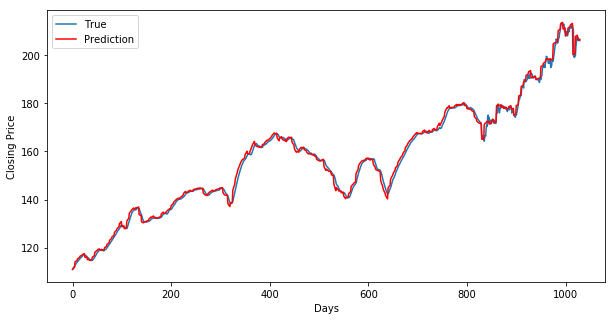

In [75]:
# ARIMA (Horizon = 5) for the last 1030 points

Horizon = 5
Actual = [x for x in train_data[:227]]
horizon_predicted = list()
counter = 0
evaluation_data = np.concatenate([train_data[227:], test_data], axis=0)

for _ in range(int(len(evaluation_data)/Horizon)):
    for i in range(Horizon):
        forecast = StartARIMAForecasting(Actual, 1,1,0)
        Actual.append(forecast)
        horizon_predicted.append(forecast)
        counter = counter + 1
       
    Actual = Actual[Horizon:-Horizon]
    [Actual.append(term) for term in evaluation_data[counter:counter+Horizon]]

horizon_predicted = np.array(horizon_predicted).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = evaluation_data.reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MSE = mean_squared_error(inverse_test_data, horizon_predicted)
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(MSE)

print('Mean Squared Error (Testing Data): %.6f' % MSE)
print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print("Number of Hits %d out of %d" % (hit_count(inverse_test_data, horizon_predicted), len(horizon_predicted)-1))

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()